In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

from src.ingestion import download_from_drive, import_palette_json

In [10]:
# existing imports and functions
palette = import_palette_json("data/palette.json")

# Profilo Finanziario (Vale)

In [ ]:
df_profinanz = download_from_drive("csv_startup_profilo_finanziario")

In [ ]:
df_profinanz.columns

In [ ]:
col_name = 'Redditività delle vendite (ROS) \n%\n2022'
bins = 80
data = df_profinanz[col_name]
#eliminare n.s e n.a
data = data.replace("n.s.", np.nan)
data = data.replace("n.d.", np.nan)
data = data.dropna()
#filtra valori numerici
data = data.astype(float)
q1, q2, q3 = np.percentile(data, [25, 50, 75])

# Creare l'istogramma
plt.figure(figsize=(10, 5))
plt.hist(data,
         bins=bins,
         color="rebeccapurple",
         edgecolor="white", alpha=0.7)

# Aggiungere linee per i quartili
plt.axvline(q1, color="orange", linestyle="dashed", linewidth=2, label="1° Quartile (Q1)")
plt.axvline(q2, color="red", linestyle="dashed", linewidth=2, label="Mediana (Q2)")
plt.axvline(q3, color="purple", linestyle="dashed", linewidth=2, label="3° Quartile (Q3)")

# Aggiungere etichette e titolo
plt.xlabel(col_name)
plt.ylabel("Frequenza")
plt.title("Istogramma con Quartili")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrare il grafico
plt.show()

# Azionisti (Anna)

In [ ]:
df_azionisti = download_from_drive("csv_azionisti")

# Startup Anagrafica (Lorenzo)

In [ ]:
# Import & Cleaning

# Import dataframe
df_s_anagrafica = download_from_drive("csv_startup_anagrafica")

# Settare index su colonna Unamed: 0
df_s_anagrafica.set_index("Unnamed: 0", inplace=True)

# Rinominare colonna Unnamed: 0 in Index
df_s_anagrafica.index.name = "Index"

# Rinominare colonna ATECO 2007 codice in ATECO
df_s_anagrafica.rename(columns={"ATECO 2007\ncodice": "ATECO"}, inplace=True)

## Data Cleaning

# Remove rows where ATECO is empty or NaN
df_s_anagrafica.dropna(subset=['ATECO'], inplace=True)

# Remove column Fondazione (beacuse is empty)
df_s_anagrafica.drop(columns=['Fondazione'], inplace=True)

# Convert ATECO in integer
df_s_anagrafica['ATECO'] = df_s_anagrafica['ATECO'].astype(int)

# Convert the column where in the title there is "Codice Postale" in integer
df_s_anagrafica.loc[:, df_s_anagrafica.columns.str.contains('Codice postale')] = df_s_anagrafica.loc[:, df_s_anagrafica.columns.str.contains('Codice postale')].astype('Int64')

# Convert the index column to integer
df_s_anagrafica.index = df_s_anagrafica.index.astype(int)

# Convert column Partita IVA to see entirely
df_s_anagrafica["Partita IVA"] = df_s_anagrafica["Partita IVA"].apply(lambda x: '{:.0f}'.format(x))
df_s_anagrafica["Partita IVA"]

# if Sede operativa - Provincia is NaN, insert the value contained in Provincia
df_s_anagrafica['Sede operativa - Provincia'].fillna(df_s_anagrafica['Provincia'], inplace=True)

# if Sede operativa - Codice postale is NaN or <NA>, insert the value contained in Indirizzo sede legale - Codice postale
df_s_anagrafica['Sede operativa - Codice postale'].fillna(df_s_anagrafica['Indirizzo sede legale - Codice postale'], inplace=True)

# if Sede operativa - Regione - Regione is NaN, insert the value contained in Indirizzo sede legale - Regione
df_s_anagrafica['Sede operativa - Regione - Regione'].fillna(df_s_anagrafica['Indirizzo sede legale - Regione'], inplace=True)

In [101]:
df_s_anagrafica.head()

,Ragione sociale,BvD ID number,Codice fiscale,Numero CCIAA,Partita IVA,Indirizzo sede legale,Provincia,Indirizzo sede legale - Codice postale,Indirizzo sede legale - Regione,Sede operativa,Sede operativa - Provincia,Sede operativa - Codice postale,Sede operativa - Regione - Regione,ATECO,Anno di costituzione,Stato giuridico,Forma giuridica
Index,,,,,,,,,,,,,,,,,
1,RAINSHOW S.R.L.,IT03595550835,3595550835,ME0248323,3595550835,"VIA FRANCESCO CRISPI, 4",Messina,98066,Sicilia,NaN,Messina,98066,Sicilia,711210,2019,Attiva,S.R.L.
2,CHECKSIG S.R.L. SOCIETA' BENEFIT,IT11028330964,11028330964,MI2573724,11028330964,"PZA DEL LIBERTY, 8",Milano,20121,Lombardia,PIAZZA DEL LIBERTY 8,Milano,20121,LOMBARDIA,620100,2019,Attiva,S.R.L.
3,OTOFARMA S.P.A.,IT08431301210,8431301210,NA0957454,8431301210,"VLE ANTONIO GRAMSCI, 17/B",Napoli,80122,Campania,VIA VIC S.M. DEL PIANTO TORRE 2,Napoli,80144,CAMPANIA,266002,2016,Attiva,S.P.A.
4,SIKELIA OIL S.R.L.,IT03577640836,3577640836,ME0247028,3577640836,"VIA STRETTO I COCCOMELLI, 64",Messina,98051,Sicilia,NaN,Messina,98051,Sicilia,473000,2019,Attiva,S.R.L.
5,POWER.IT S.R.L.,IT04355290166,4355290166,BG0456683,4355290166,"VIA ALESSANDRO NOLI, 13",Bergamo,24125,Lombardia,NaN,Bergamo,24125,Lombardia,352300,2019,Attiva,S.R.L.


In [93]:
df_s_anagrafica["Anno di costituzione"].value_counts()

Anno di costituzione
2021    2450
2020    1944
2024    1925
2022    1888
2023    1842
2019    1206
2018     374
2017     164
2016      82
2015      54
2014      13
2025       7
2013       4
2011       1
Name: count, dtype: int64

## Foundation Year (Pre and Post 2019)

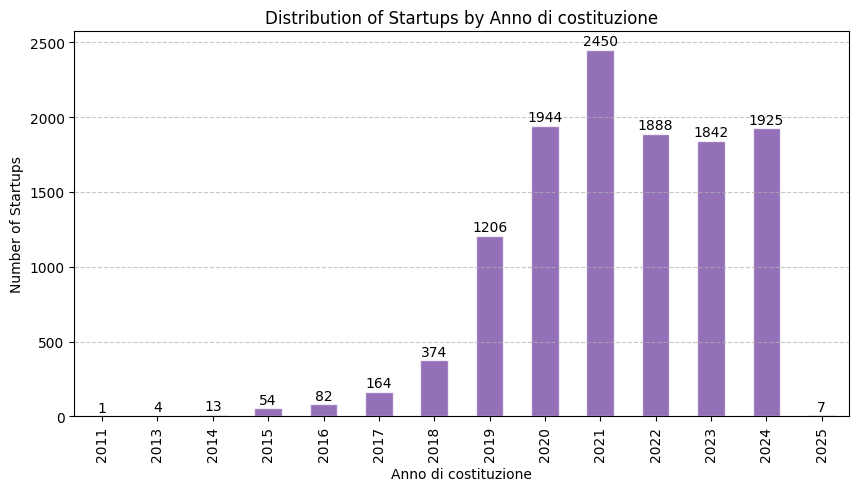

In [79]:
# Distribution of startups grouped by Anno di costituzione
anno_costituzione_counts = df_s_anagrafica["Anno di costituzione"].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 5))
anno_costituzione_counts.plot(kind='bar', color="rebeccapurple", edgecolor="white", alpha=0.7)
for i in range(len(anno_costituzione_counts)):
    plt.text(i, anno_costituzione_counts.iloc[i] + 10, str(anno_costituzione_counts.iloc[i]), ha='center', va='bottom')
plt.xlabel("Anno di costituzione")
plt.ylabel("Number of Startups")
plt.title("Distribution of Startups by Anno di costituzione")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [67]:
# Creare df con startup costituite dal 2019 in avanti (facendo riferimento alle ultime 4 cifre dalla data di costituzione)
df_s_anagrafica["Anno di costituzione"] = df_s_anagrafica["Anno di costituzione"].apply(lambda x: int(str(x)[-4:]))
df_s_anagrafica_post2019 = df_s_anagrafica[df_s_anagrafica["Anno di costituzione"] >= 2019]

In [68]:
# Create df with startup founded before 2019
df_s_anagrafica["Anno di costituzione"] = df_s_anagrafica["Anno di costituzione"].apply(lambda x: int(str(x)[-4:]))
df_s_anagrafica_pre2019 = df_s_anagrafica[df_s_anagrafica["Anno di costituzione"] < 2019]

In [ ]:
df_s_anagrafica_post2019.info()

Si osserva che solo 1837 Startup indicano una sede operativa: sono le uniche che hanno sede operativa diversa da sede legale

In [ ]:
# Create df with startup grouped by region
df_s_anagrafica_post2019["Indirizzo sede legale - Regione"].value_counts()

## Distribuzione Geografica

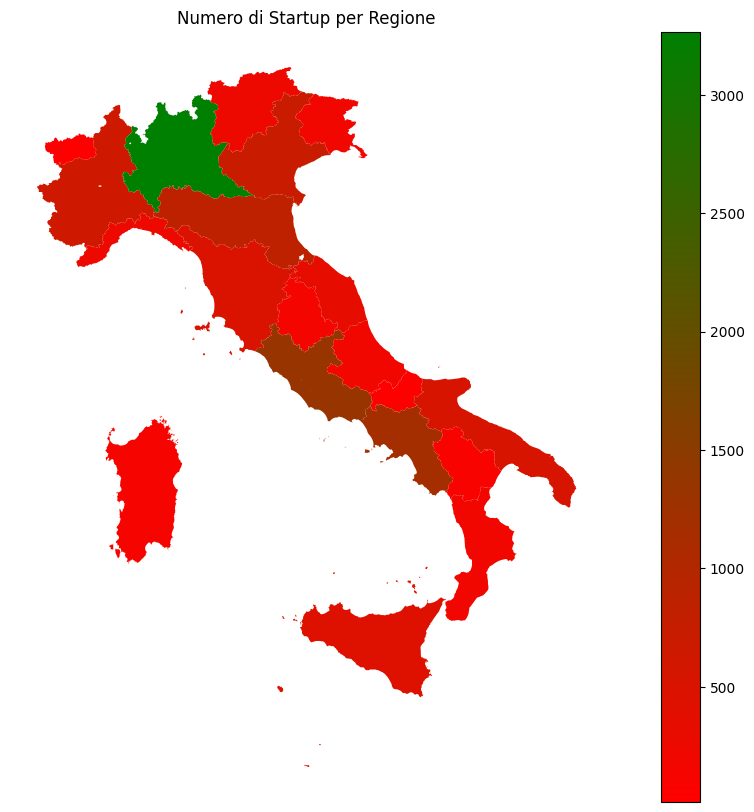

In [25]:
# Use Geopandas to create a map of italy with colour intensity based on the number of startups in each region
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.colors as mcolors

# Load the Italy map
italy = gpd.read_file("https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_regions.geojson")

# Create a DataFrame with the number of startups in each region
df_startup_per_region = df_s_anagrafica_post2019["Indirizzo sede legale - Regione"].value_counts().reset_index()
df_startup_per_region.columns = ["Regione", "Numero di Startup"]

# Merge the two DataFrames
italy = italy.merge(df_startup_per_region, left_on="reg_name", right_on="Regione")

# Plot the map

# Create a colormap from red to green
cmap = mcolors.LinearSegmentedColormap.from_list("RedGreen", [palette["color_failure"], palette["color_success"]])
#cmap = mcolors.ListedColormap([palette["color_failure"], palette["color_success"]])

italy.plot(column="Numero di Startup", legend=True, figsize=(15, 10), cmap=cmap)
plt.title("Numero di Startup per Regione")
plt.axis("off")
plt.show()


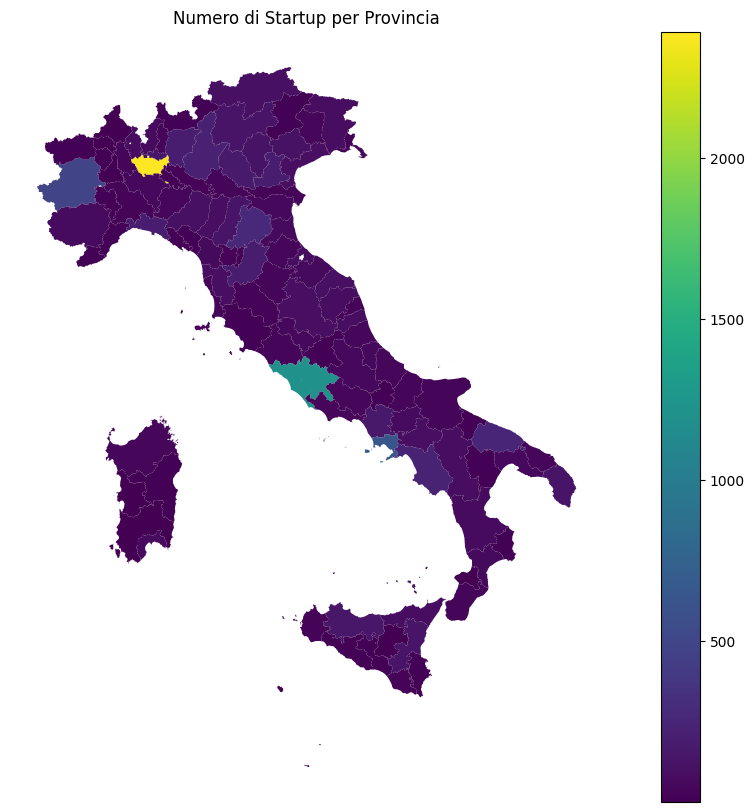

In [27]:
# Use Geopandas to create a map of italy with colour intensity based on the number of startups in each provincia
# Create a DataFrame with the number of startups in each provincia
df_startup_per_provincia = df_s_anagrafica_post2019["Provincia"].value_counts().reset_index()
df_startup_per_provincia.columns = ["Provincia", "Numero di Startup"]

# Load the Italy map with provinces
italy_provinces = gpd.read_file("https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_provinces.geojson")

# Merge the two DataFrames
italy_provinces = italy_provinces.merge(df_startup_per_provincia, left_on="prov_name", right_on="Provincia")

# Plot the map
italy_provinces.plot(column="Numero di Startup", legend=True, figsize=(15, 10))
plt.title("Numero di Startup per Provincia")
plt.axis("off")
plt.show()

## Distribuzione per codici ATECO

In [82]:
# Create df with startup grouped by ATECO
# Raggruppare in base alle prime n cifre del codice ATECO
n = 2
df_s_anagrafica_post2019[f"ATECO_{n}"] = df_s_anagrafica_post2019["ATECO"].apply(lambda x: str(x)[:n])
df_s_anagrafica_post2019[f"ATECO_{n}"].value_counts()
#df_s_anagrafica_post2019["ATECO"[::4]].value_counts()

/tmp/ipykernel_73061/134982787.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s_anagrafica_post2019[f"ATECO_{n}"] = df_s_anagrafica_post2019["ATECO"].apply(lambda x: str(x)[:n])


ATECO_2
62    5057
72    1653
63     851
70     325
74     288
      ... 
49       1
95       1
37       1
50       1
92       1
Name: count, Length: 72, dtype: int64

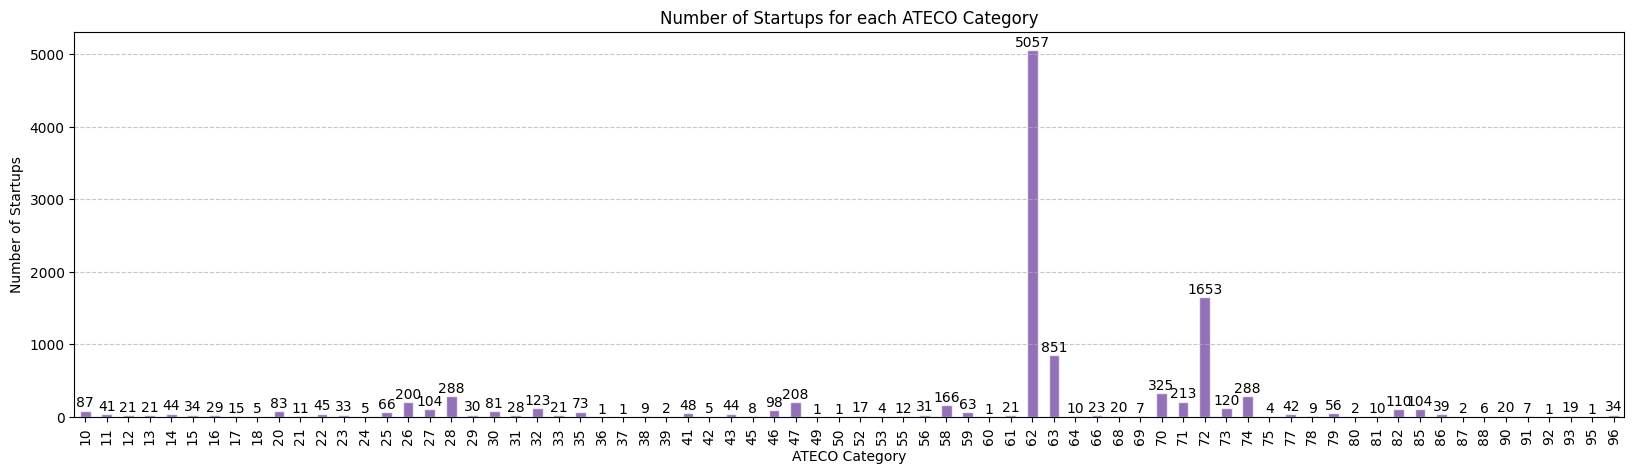

In [87]:
# Create an histogram with the number of startups for each ATECO category
ateco_counts = df_s_anagrafica_post2019[f"ATECO_{n}"].value_counts().sort_index()
plt.figure(figsize=(20, 5))
ateco_counts.plot(kind='bar', color="rebeccapurple", edgecolor="white", alpha=0.7)
for i in range(len(ateco_counts)):
    plt.text(i, ateco_counts.iloc[i] + 10, str(ateco_counts.iloc[i]), ha='center', va='bottom')
plt.xlabel("ATECO Category")
plt.ylabel("Number of Startups")
plt.title("Number of Startups for each ATECO Category")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [ ]:
# Load the file with the meaning of ATECO codes
df_significato_codici_ateco = download_from_drive("csv_significato_codici_ateco")

# Convert the ATECO_2 column in ateco_counts to string
ateco_counts.index = ateco_counts.index.astype(str)

# Convert the Codice ATECO column in df_significato_codici_ateco to string
df_significato_codici_ateco["Codice ATECO"] = df_significato_codici_ateco["Codice ATECO"].astype(str)

# Merge the ATECO counts with their meanings
df_ateco_analysis = pd.DataFrame(ateco_counts).reset_index()
df_ateco_analysis.columns = ["ATECO_2", "Numero di Startup"]
df_ateco_analysis = df_ateco_analysis.merge(df_significato_codici_ateco, left_on="ATECO_2", right_on="Codice ATECO")

# Sort by the number of startups
df_ateco_analysis = df_ateco_analysis.sort_values(by="Numero di Startup", ascending=False)

# Display the analysis
df_ateco_analysis[["ATECO_2", "Numero di Startup", "Settore di attività"]]
# Focus on top 10 ATECO categories
df_ateco_analysis_top10 = df_ateco_analysis.head(10)
df_ateco_analysis_top10[["ATECO_2", "Numero di Startup", "Settore di attività"]]

,ATECO_2,Numero di Startup,Settore di attività
44,62,5057,"Produzione di software, consulenza informatica..."
52,72,1653,Ricerca scientifica e sviluppo
45,63,851,Attività dei servizi d'informazione
50,70,325,Attività di direzione aziendale e di consulenz...
54,74,288,"Altre attività professionali, scientifiche e t..."
17,28,288,Fabbricazione di macchinari e attrezzature
51,71,213,Attività degli studi di architettura e ingegneria
33,47,208,Commercio al dettaglio (escluso autoveicoli e ...
15,26,200,"Fabbricazione di computer, prodotti di elettro..."
40,58,166,Attività editoriali


## Distribuzione per Forma Giuridica

/tmp/ipykernel_73061/3881831382.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, forma_giuridica_counts[i] + 10, str(forma_giuridica_counts[i]), ha='center', va='bottom')


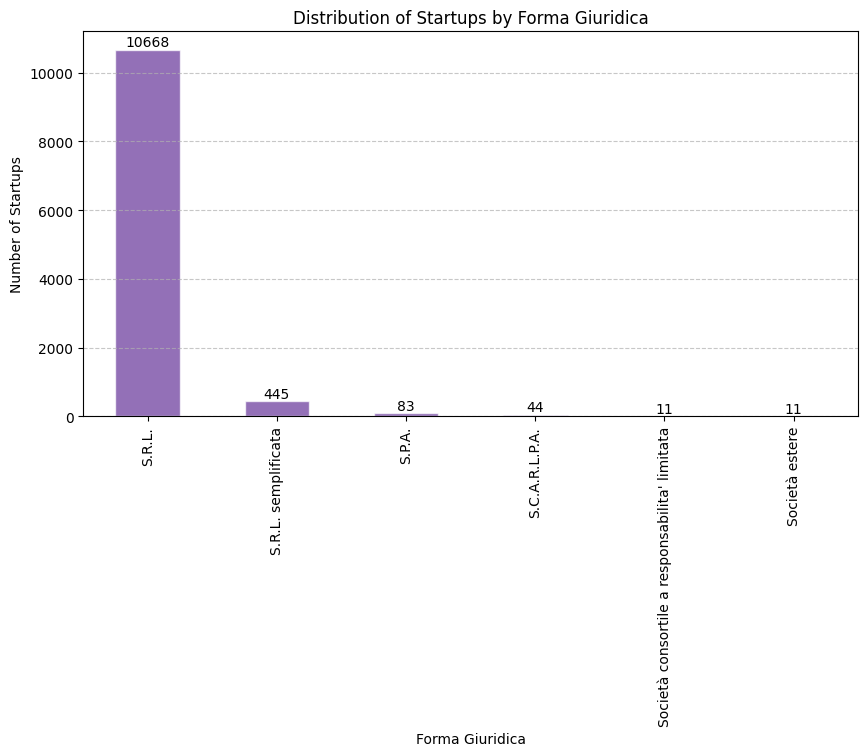

In [ ]:
# Distribution of startup grouped by Forma Giuridica
forma_giuridica_counts = df_s_anagrafica_post2019["Forma giuridica"].value_counts() # Count the number of startups for each Forma Giuridica

# Plot the distribution
plt.figure(figsize=(10, 5))
forma_giuridica_counts.plot(kind='bar', color="rebeccapurple", edgecolor="white", alpha=0.7)
for i in range(len(forma_giuridica_counts)):
    plt.text(i, forma_giuridica_counts[i] + 10, str(forma_giuridica_counts[i]), ha='center', va='bottom')
plt.xlabel("Forma Giuridica")
plt.ylabel("Number of Startups")
plt.title("Distribution of Startups by Forma Giuridica")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Distribuzione ...